In [1]:
#for reducing error: 
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd

data = pd.read_csv('./Car_Insurance_Claim.csv')

print(data.info())
print(data.head(12))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

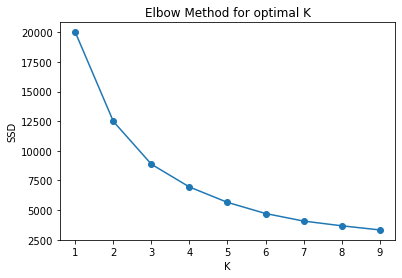

1 	 20000 	 0
2 	 12483 	 -7517
3 	 8869 	 -3614
4 	 6949 	 -1920
5 	 5651 	 -1298
6 	 4712 	 -939
7 	 4075 	 -637
8 	 3676 	 -399
9 	 3328 	 -348


In [2]:
#do the KMeans analysis on CREDIT_SCORE and ANNUAL_MILEAGE columns
KM_data = data.loc[:,['CREDIT_SCORE', 'ANNUAL_MILEAGE']]
KM_data = KM_data.fillna(data.median())

KM_data = scale(KM_data)

#work through the loop here
SSD = []

K = range(1,10)

for k in K:
    kmeansTest = KMeans(n_clusters=k)
    kmeansTest = kmeansTest.fit(KM_data)
    SSD.append(kmeansTest.inertia_)
    
plt.plot(K, SSD, 'o-')
plt.xlabel('K')
plt.ylabel('SSD')
plt.title('Elbow Method for optimal K')
plt.show()

for x in range(len(SSD)):
    print(x+1, '\t', round(SSD[x]), '\t', [round((SSD[x] - SSD[x-1])) if x > 0 else 0][0])

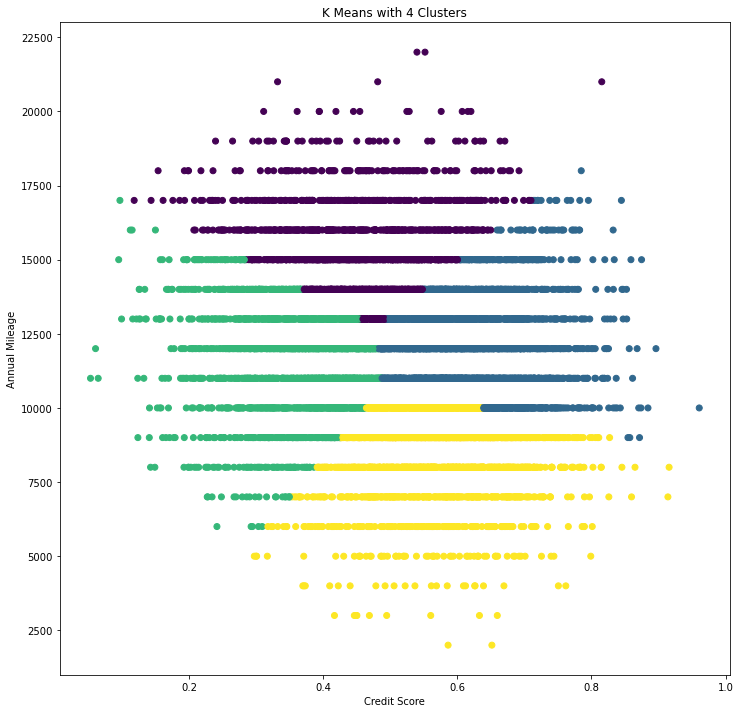

In [3]:
#Final KMeans and visual representation of it
final_KMeans = KMeans(n_clusters=4)
final_KMeans = final_KMeans.fit(KM_data)

plt.figure(figsize=(12,12))
plt.scatter(data['CREDIT_SCORE'], data['ANNUAL_MILEAGE'], c=final_KMeans.labels_.astype(float))
plt.xlabel('Credit Score')
plt.ylabel('Annual Mileage')
plt.title('K Means with 4 Clusters')
plt.show()